In [1]:
from qiskit import IBMQ, QuantumRegister, QuantumCircuit, ClassicalRegister
from qiskit.compiler import transpile, assemble
#from qiskit.result import Result
#from qiskit.pulse import DriveChannel, ControlChannel, MeasureChannel, AcquireChannel, Play, Schedule
#from qiskit.ignis.mitigation import complete_meas_cal, CompleteMeasFitter
#from qiskit.ignis.characterization import t1_circuits, T1Fitter
from qiskit.visualization import plot_histogram
#style = SchedStyle(figsize=(5, 5))
from qiskit import Aer

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [5, 5]


In [2]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-university', group='uni-pittsburgh', project='main')

C:\Users\jsten\Anaconda3\envs\qiskit20_new\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [129]:
backend = provider.get_backend('ibmq_casablanca')
#backend = Aer.get_backend("qasm_simulator")

In [134]:
qr = QuantumRegister(2, name='q')
cr = ClassicalRegister(4, name='c')
qc = QuantumCircuit(qr, cr)

qc.reset([0,1])
qc.h(0)
#qc.measure(0,0)
qc.h(0)
qc.measure(0,1)



qc.draw()

┌───┐┌───┐┌─┐
q_0: ─|0>─┤ H ├┤ H ├┤M├
          └───┘└───┘└╥┘
q_1: ─|0>────────────╫─
                     ║ 
c: 4/════════════════╩═
                     1

In [135]:
qobj = assemble(transpile(qc, backend=backend), backend=backend, shots=2056)

In [136]:
# RUN the job
job = backend.run(qobj)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

602feab061d55e386120d091
Job Status: job has successfully run


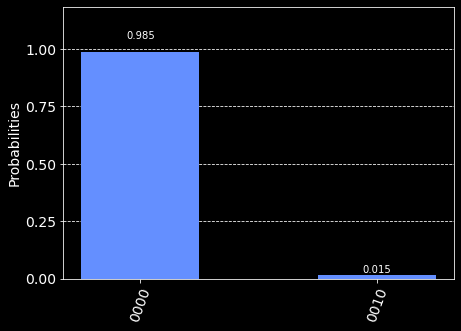

In [137]:
plot_histogram(job.result().get_counts())